## Image handling

In [1]:
import matplotlib.pyplot as plt

from torchscope.utils import (load_image,
                              apply_transforms,
                              denormalize,
                              format_for_plotting)

### 1. Load an image

In [2]:
image = load_image('./images/dalmatian_01.jpg')

print(type(image))
print(image.mode)

<class 'PIL.Image.Image'>
RGB


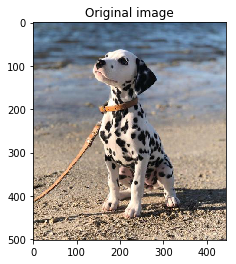

In [3]:
plt.imshow(image)
plt.title('Original image');

### 2. Tranform a PIL image to a PyTorch tensor

In [4]:
input_image = apply_transforms(image, 299)  # can take custom size (default=224)

print(type(input_image))
print(input_image.shape)

<class 'torch.Tensor'>
torch.Size([1, 3, 299, 299])


`input_image` is a `tensor` which has the right transformation applied and has the right shape `(N, C, H, W)`.

  - N: number of images in a batch
  - C: number of channels
  - H: height of the image
  - W: width of the image


It is ready to be fed into neural networks!

But before, it is often important to visualise the image you are feeding in.

### 3. Format a tensor for plotting

Typically, the input to a CNN includes a dimension for batch size (such as `(N, C, H, W)` in this case), which is not suitable for plotting it as an image. `format_for_plotting()` provides an easy way to format their shape into `(H, W, C)` which `matplotlib` expects, by removing the batch dimension and pushing the channel dimention to the last.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


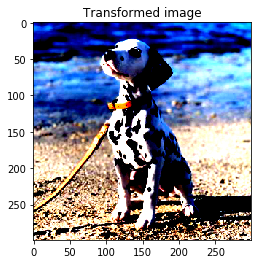

In [5]:
plt.imshow(format_for_plotting(input_image))
plt.title('Transformed image');

### 4. Denormalise a tensor for visualisation

As you can see above, `matplotlib` complains and clips values when you try to plot the transformed image, and the colours look saturated. This is because pixel values in the transformed image aren't within the ranges `matplotlib` expects: [0, 1] for floats or [0, 255] for integers.

Why?

It is due to transformations applied earlier.

When transforming a `PIL` image to a `tensor` with `apply_transforms()`, the function applies normalisation using the means and standard deviations taken from ImageNet dataset, as the pre-trained models expect input data to be normalised and standardised in the same way (see the [torchvision.models doc](https://pytorch.org/docs/stable/torchvision/models.html#torchvision-models) for details).

You can use `denormalize()` to reverse the normalisation performed on the input image.

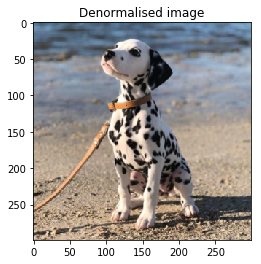

In [6]:
denormalized = denormalize(input_image)

plt.imshow(format_for_plotting(denormalized))
plt.title('Denormalised image');